<a href="https://colab.research.google.com/github/carloscarvajal1cc/UTS_MachineLearning_Assigment2/blob/Andres/Copy_of_Copy_of_19_09Assigment2_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: titulo aqui






<br>32513 Machine Learning Spring 2019
<br>By Carlos Mario Carvajal Moreno. Student ID: 13144148
<br>and Andres Felipe Lagos Rodriguez. Student ID: 13092248
    




trying a new change

# Abstract



<p align="justify"> 

---
### index 


---



# I. Introduction
<br><p align="justify"> Define Problem; Justify
Significance W-200**

# II. Exploration

<br><p align="justify"> identify challenges; design data structures, plan data models and tests (300)


# III. Methodology
<br>
<p align="justify"> Implement algorithms; build and train data models (300 words)

# IV. Evaluation
<br>
<p align="justify"> Report execution on data, perform and report testing,
perform efficiency analysis, do possible comparative analysis 200 words.

# V.	Conclusion

<br><p align="justify"> Discuss reflections, proppose possible improvements.
 




In [0]:
unsqueeze

NameError: ignored

# VI.	Ethical Discussion

<br><p align="justify"> 
  {The report includes discussions about the social/ethical aspect of the proposed technique/
project. You can adopt one or more ethical models, such as the utilitarian approach or the
Kantian duty-based approach. You should anticipate the potential misuses of your technique. }

# VII.	References.





The report is clearly structured and well written.

The practical problem is well-motivated with clear practical significance. The design/planning
of the research/development is clear and logical, including considerations about data
acquisition, quality control, modelling techniques, evaluation method and criteria, etc.
The design of data models and experiments is logical. The implementation is correct, efficient
and practically complete (comparing, or at least, considering alternatives). The evaluation
report is convincing; the implementation of the experiments can be easily accessed from a
cloud-based service such as Github and replicated for assessment

#8. Draft and experimenting section

<br><p align="justify"> This section is designed to experiment and try to reinforce the authors claim or to show some of the aspects that were recomended for improvement, by using the technology capacity of today.

<br><p align="justify"> First, lets import a series of packages that will help developing the analysis:

## 8.1. Importing the dataset 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -uq "/content/drive/My Drive/skindata" -d "/content/drive/My Drive/skindata"

In [0]:
import os
print(os.listdir('/content/drive/My Drive/skindata/train/malignant'))

['1445.jpg', '117.jpg', '1243.jpg', '863.jpg', '489.jpg', '1077.jpg', '1162.jpg', '942.jpg', '805.jpg', '1068.jpg', '125.jpg', '1179.jpg', '1343.jpg', '921.jpg', '989.jpg', '978.jpg', '544.jpg', '961.jpg', '966.jpg', '225.jpg', '690.jpg', '1473.jpg', '223.jpg', '1132.jpg', '365.jpg', '700.jpg', '649.jpg', '235.jpg', '56.jpg', '1047.jpg', '1376.jpg', '899.jpg', '319.jpg', '1214.jpg', '1103.jpg', '1253.jpg', '444.jpg', '76.jpg', '1314.jpg', '75.jpg', '1182.jpg', '410.jpg', '51.jpg', '136.jpg', '281.jpg', '1062.jpg', '1222.jpg', '695.jpg', '1093.jpg', '664.jpg', '810.jpg', '1082.jpg', '712.jpg', '1260.jpg', '731.jpg', '812.jpg', '595.jpg', '143.jpg', '1340.jpg', '723.jpg', '1042.jpg', '263.jpg', '1044.jpg', '516.jpg', '386.jpg', '698.jpg', '920.jpg', '118.jpg', '779.jpg', '646.jpg', '177.jpg', '999.jpg', '530.jpg', '883.jpg', '63.jpg', '1439.jpg', '12.jpg', '150.jpg', '1413.jpg', '740.jpg', '1350.jpg', '1171.jpg', '351.jpg', '1431.jpg', '1368.jpg', '28.jpg', '618.jpg', '777.jpg', '933.jpg

In [0]:
from pathlib import Path
from google.colab import drive

DATA_FILENAME = "skindata"

data_dir = Path('./content/drive/My Drive/skindata/')
data_dir.mkdir(parents=True, exist_ok=True) 
filepath = data_dir / DATA_FILENAME

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

        # Authenticate and create the PyDrive client.
        # This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

        # Download a file based on its file ID.
        #
        # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1VYOQ-wOo-KMqPgKA4b5pl4xoNzE2YbX2'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile(str(filepath))

In [0]:
import skimage
import numpy as np
import pandas as pd
import random as rd

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(11) # It's my lucky number
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
import itertools
from skimage.io import imread
from skimage.transform import resize
import keras
from keras.utils.np_utils import to_categorical

from time import time
import logging

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

Using TensorFlow backend.


As the File has two folders, one contains a trainset and the other as testing set. This has been preset by kaggle, so in this case we are going to take the training set and split it into a training and testing and we are goint to take the test file as a validation set for a final evaluation of our model.

It is required to convert the data to RGB and label them

In [0]:
FileBenignTrain = '/content/drive/My Drive/skindata/train/benign'
FileMalignTrain = '/content/drive/My Drive/skindata/train/malignant'

FileBenignTest = '/content/drive/My Drive/skindata/test/benign'
FileMalignTest = '/content/drive/My Drive/skindata/test/malignant'

read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [0]:
import torch.utils.data
from torchvision import datasets
from torchvision.transforms import ToTensor

In [0]:
tr_data = datasets.ImageFolder('/content/drive/My Drive/skindata/train/', transform=ToTensor())

In [0]:
tr_dataload = torch.utils.data.dataloader.DataLoader(tr_data, batch_size=4)

In [0]:
for x, y in tr_dataload:
  break

In [0]:
x1 = x.numpy().reshape([4, -1])
print(x1.shape)

(4, 150528)


In [0]:
x.shape, y

(torch.Size([4, 3, 224, 224]), tensor([0, 0, 0, 0]))

In [0]:
train_dataset=datasets.ImageFolder(root="./root/",transform=train_transforms)

Now, we will load the training set 

In [0]:
BeningImages = [read(os.path.join(FileBenignTrain, filename)) for
              filename in os.listdir(FileBenignTrain)]
XBening = np.array(BeningImages, dtype='uint8')


MalignantImages = [read(os.path.join(FileMalignTrain, filename)) for
                 filename in os.listdir(FileMalignTrain)]
XMalignant = np.array(MalignantImages, dtype='uint8')

Now, we will load the testing pictures as a testing set

In [0]:
BeningImages = [read(os.path.join(FileBenignTest, filename)) for
              filename in os.listdir(FileBenignTest)]
XBeningTest = np.array(BeningImages, dtype='uint8')
MalignantImages = [read(os.path.join(FileMalignTest, filename)) for
                 filename in os.listdir(FileMalignTest)]
XMalignantTest = np.array(MalignantImages, dtype='uint8')

In [0]:
# Now lets check the shape of our arrays 
XBening.shape

(1440, 224, 224, 3)

The XBening array contains 1440 images with size 224x224 using the RGB colors.

Let's give labels to the images by assgining zero when the classification is Bening(0) and ones when the classification is Malignant(1). Thus, the set XBening will have a correspondant array YBening with values zeros for each one of the observations. This is why the size of the first element of the array XBening or in other words XBening[0] will determine the size of the zero array representing the labels as YBening. 

Equally it applies for XMalignant(1) and the testing sets.

In [0]:
YBening = np.empty(XBening.shape[0], dtype = str)
for i in range(XBening.shape[0]):
  YBening[i]="Bening"
YMalignant = np.empty(XMalignant.shape[0], dtype = str)
for i in range(XMalignant.shape[0]):
  YMalignant[i]="Malignant"


YBeningTest = np.empty(XBeningTest.shape[0], dtype = str)
for i in range(XBeningTest.shape[0]):
  YBeningTest[i]="Bening"
YMalignantTest = np.empty(XMalignantTest.shape[0], dtype = str)
for i in range(XMalignantTest.shape[0]):
  YMalignantTest[i]="Malignant"

In [0]:
print("The shape of the XMalignant array is: {}".format(XMalignant.shape))
print("the number of observations in this array is {}".format(XMalignant.shape[0]))
print("Which has to have the same number of labels represented by the YMalignant array whose shape is {}"
      .format(YMalignant.shape))

The shape of the XMalignant array is: (1197, 224, 224, 3)
the number of observations in this array is 1197
Which has to have the same number of labels represented by the YMalignant array whose shape is (1197,)


Let's plot the image and see the difference between malignant and bening skin moles

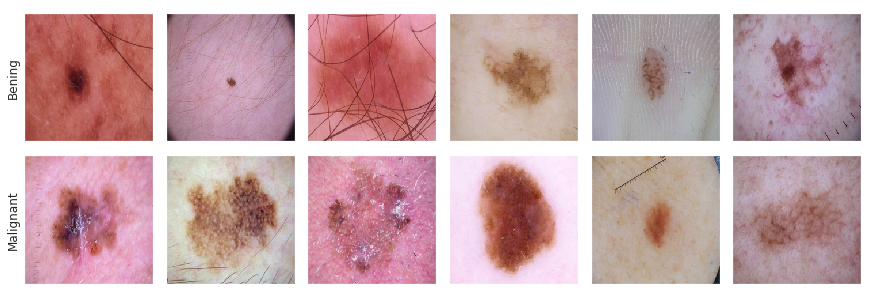

In [0]:
fig, ax = plt.subplots(2, 6, figsize=(15, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(6):
    ax[0, i].imshow(XBening[i])
    ax[1, i].imshow(XMalignant[i])
    
ax[0, 0].set_ylabel('Bening')
ax[1, 0].set_ylabel('Malignant');

Or lets vizualize only one MALIGNANT mole

The following image is Malignant


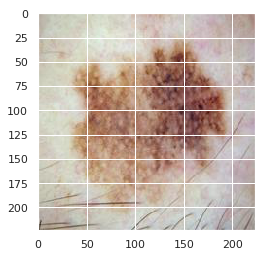

In [0]:
print("The following image is Malignant")
plt.imshow(XMalignant[1])

After building correspondant arrays with the classes for each image, we are going to merge the bening images and malignant images creating a train set and a testing set respectively, and we will do the same with the labels.

In [0]:
X_train = np.concatenate((XBening, XMalignant), axis = 0)
y_train = np.concatenate((YBening, YMalignant), axis = 0)

X_test = np.concatenate((XBeningTest, XMalignantTest), axis = 0)
y_test = np.concatenate((YBeningTest, YMalignantTest), axis = 0)

In [0]:
print("Thus, the training set will have a shape of {}".format(X_train.shape))
print("And the testing set will have a shape of {}".format(X_test.shape))

Thus, the training set will have a shape of (2637, 224, 224, 3)
And the testing set will have a shape of (660, 224, 224, 3)


Consequently, in order to prevent bias in the model we are going to shuffle the data 

In [0]:
shuffled = np.arange(X_train.shape[0])
np.random.shuffle(shuffled)
X_train = X_train[shuffled]
y_train = y_train[shuffled]

shuffled = np.arange(X_test.shape[0])
np.random.shuffle(shuffled)
X_test = X_test[shuffled]
y_test = y_test[shuffled]

In [0]:
OriginalXset = np.copy(X_train)
OriginalXtestset = np.copy(X_test)
Originalyset = np.copy(y_train)
Originalysettest = np.copy(y_test)

Thus, the following image correspond to a B mole


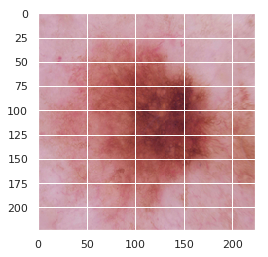

In [0]:
Image_number = 505

print("Thus, the following image correspond to a {} mole".format(y_train[Image_number]))
plt.imshow(X_train[Image_number])


In [0]:
target_names= np.empty(2, dtype = str)



target_names[0] = 'Bening'
target_names[1] = 'Malignant'

target_names


array(['B', 'M'], dtype='<U1')

## 8.2. A simple classifier

In this section we are going to build a simple classifier and train it with the training set and will measure the time this takes. This exercise will serve as a reference point because subsequently we will develop methods to reduce the complexity of the data (by using PCA for example) so the model runs in less time and also will compare their performance. Let's start with Support Vector Classifier. 

In [0]:
X_train.shape

(2637, 224, 224, 3)

In [0]:
n_images

2637

In [0]:
x1 = x.numpy().reshape([4, -1])

In [0]:
n_images, h, w, d = X_train.shape


X_= np.copy(X_train.reshape([n_images,-1]))


In [0]:
X_.shape

(2637, 150528)

In [0]:
y = X_.reshape([2637,224,224,3])

In [0]:
y.shape

(2637, 224, 224, 3)

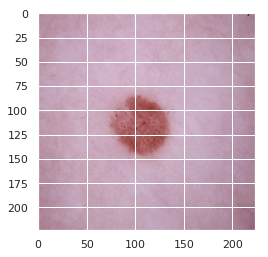

In [0]:
plt.imshow(y[1])

In [0]:
x = torch.tensor(3)
x

tensor(3)

In [0]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing


In [0]:
np.maximum(X_[:,:,1])

ValueError: ignored

In [0]:
pca = PCA(n_components=150)

outcome = pca.fit_transform(X_)

In [0]:
projected = pca.inverse_transform(outcome)

In [0]:
v = projected.reshape(X_.shape[0],224,224)

In [0]:
plt.imshow(v[1])

In [0]:
X_train[0]

In [0]:
from sklearn import tree

In [0]:
print("Training the classifier on the training set")

t0 = time()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[:,0,1], y_train)

print("Training the model took {}s".format(time() - t0))

In [0]:
n_images, h, w, d = X_test.shape
X_test = X_test.reshape((n_images,h*w*d))

In [0]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clf.predict(X_test)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=['B','M']))

## Conclusion 1

The classifier took a lot of time to be trained with the training set because of the high complexity of the image data. As a single image has a dimensionality of 224 x 224 and it is adding colors instead of using a grey scale, there is an extra dimension that uses the represents the three colors Red, Green and Blue. 

Our main goal is to reduce the complexity of the classifier and therefore our first approach is to implement Principal Components Analysis to reduce the number of Dimensions and therefore the complexity of the model.

## Principal Components Analysis

Due to the large number of components or dimensions found in the image, the performance of the algorithm gets affected by big calculations. In this section, we will implement PCA in order to reduce the number of components or dimensions in the image space, so the algorithm will perform less calculations and reduce its computational cost.

In [0]:
X_train.shape

In [0]:
t0 = time()

pca = PCA(n_components = 500, svd_solver='randomized', whiten=True)


Therefore, it is important to decide on the number of components that we want to reduce the image space to. Thus we present the following graph to have an overview of the variation explained by the components. 

The previous image suggest that the optimal number of components between 300 and 400 explain 95% of the variance of images. Therefore, because we are reducing the complexity of the model, we will only use 300 number of components.

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [0]:
t0 = time()

n_components = 400

pca = PCA(n_components = n_components, svd_solver='randomized', whiten=True)
print("Reducing the number of components took {}s".format(time() - t0))

Reducing the number of components took 8.344650268554688e-05s


In [0]:
# let's transform the image to the new reduced dimensions.

output = pca.fit_transform(X_)
output.shape


print("Reducing the number of components took {}s".format(time() - t0))

Reducing the number of components took 207.73745679855347s


In [0]:
output.shape

(2637, 400)

The number of dimensions has been reduced to 150. Now, we are going to reconstruct the first five images to do a visual comparison between a full image and dimensionality reduced image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


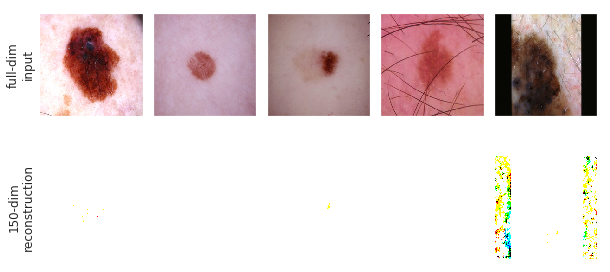

In [0]:
projected = pca.inverse_transform(output)
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(OriginalXset[i])
    ax[1, i].imshow(projected[i].reshape(224,224,3), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

In [0]:
print("Training the classifier on the training set")

t0 = time()

clf = tree.DecisionTreeClassifier()
clf = clf.fit(output, y_train)

print("Training the model took {}s".format(time() - t0))

Training the classifier on the training set
Training the model took 1.066239356994629s


In [0]:
X_t= np.copy(X_test.reshape([X_test.shape[0],-1]))

In [0]:
X_t.shape

(660, 150528)

In [0]:
X_test_pca = pca.fit_transform(X_t)

In [0]:
print("Using the model on the test set to classify moles")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("The time it takes to evaluate the test set is {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=['B','M']))

Using the model on the test set to classify moles
The time it takes to evaluate the test set is 0.0011675357818603516s
              precision    recall  f1-score   support

           B       0.64      0.62      0.63       360
           M       0.56      0.59      0.58       300

    accuracy                           0.60       660
   macro avg       0.60      0.60      0.60       660
weighted avg       0.61      0.60      0.61       660

[[222 138]
 [123 177]]


Numero de componentes


In [0]:
from sklearn.svm import SVC

### SVM

In [0]:
print("Training the classifier with training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(output, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Training the classifier with training set
done in 502.4003915786743s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=['B','M']))

Predicting people's names on the test set
done in 0.6061766147613525s
              precision    recall  f1-score   support

           B       0.91      0.53      0.67       360
           M       0.62      0.93      0.75       300

    accuracy                           0.72       660
   macro avg       0.77      0.73      0.71       660
weighted avg       0.78      0.72      0.71       660

[[192 168]
 [ 20 280]]


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [0]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [0]:
print("Training the classifier with training set")

param_grid = {'n_estimators': (100, 1000, 100),
              'max_depth': (10,100,10), }
    clf = GridSearchCV(RandomForestClassifier(random_state=0),param_grid,cv=5, iid=False)
                  
clf = clf.fit(output, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Training the classifier with training set


In [0]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=['B','M']))

Predicting people's names on the test set
done in 0.01838850975036621s
              precision    recall  f1-score   support

           B       0.62      0.83      0.71       360
           M       0.66      0.40      0.49       300

    accuracy                           0.63       660
   macro avg       0.64      0.61      0.60       660
weighted avg       0.64      0.63      0.61       660

[[298  62]
 [181 119]]


### Convolutional Neural Network


In [0]:
from keras.layers import Dense
from keras.models import Sequential



In [0]:
model = Sequential()

In [0]:
model.add(Dense(10, activation = 'relu', input_shape = (X_train.shape[1],)))


In [0]:
model.add(Dense(20, activation =  'relu', input_shape = (X_train.shape[1],)))

## VIII-II Eigenfaces and PCA

Lets import the PCA functions from Sklearn:

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components = 150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)

In [0]:
output = pca.fit_transform(faces.data)
output.shape

In [0]:
# Let's assigned the arrays to our output matrix:
n_samples, h = output.shape

#let's call our output matrix X, where the second [1], array correspond to features
X = output.data
n_features = X.shape[1]

In [0]:
# lets formalized our output:

print("Total dataset size:")
print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))

In [0]:
# now lets assigned y to the array containing the target values.

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

In [0]:
print("n_classes: {}".format(n_classes))
print("The target values must be equal to the number of samples, which is {}".
      format(y.shape[0]))

In [0]:
# or the same procedure can be done by:

# n_samples, h, w = faces.images.shape

If we plot the variance explained by the number of components, we can observe that the first 80 components explain 90% of the variance of the images. Which mean that it is not necessary to consider a large number of dimensions in order to build a face recognition model.

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Also, we can plot the variance effect of each component in the image set. For these purpose, I am just going to plot the first 10 components and their corresponding explained variance:

In [0]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing

In [0]:
a = pca.explained_variance_ratio_[[range(10)]]

In [0]:
per_var = np.round(a*100, decimals = 1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Variance explenation by first 10 principal components')
plt.show()

print("The sum of the first 10 components correspond to {}% of the variation explained by them"
      .format(round(sum(a)*100)))

We will now visualize what the first images of our data set would look like by only considering the first number of components, in order to have an overview of what variations they consider:

In [0]:
fig, axes = plt.subplots(3, 5, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    


On the other hand, if we apply inverse_transform to return the data to its original dimension (only with the value of the 150 components) we can plot the image to see how similar it looks to the original. This time let's use matplotlib to compare to the original image.

In [0]:
#let's transform the matrix to its original dimensions by first doing
#an inverse transform of the output and then reshaping it to (1348,62,47)

projected = pca.inverse_transform(output)

In [0]:
#Let's print the name of the class in the dataset and the reconstruction 
# of the pixels in a plot, given by its position in the dataset.
#but now we will use the PCA inverse dataset (150 PCs)

picture_number = 300 #remember there are 1348 images, any image can be observed 
                    #choosing a number between 0 and 1348 as well as the
                      #corresponding name.

print("The following image correspond to {}".format(faces.target_names[
    faces.target[picture_number]]))
plt.imshow(projected[picture_number].reshape(62,47))

# it is necessary to reshape to convert the image to its original seet (62,47)
#instead of (2914)

With only 150 components, the image is very similar to what we plotted before considering all the dimensions. 

<br> Additionally, if we extend this plotting to mor examples we can do a comparison between a full input and the reconstruction of the images with only 150 components. as follow:

In [0]:
fig, ax = plt.subplots(2, 5, figsize=(10, 5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(5):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

### Conclusion 1:

<p align="justify"> 
The authors are right by claiming that it is necessary to reduce the dimensionality of the images by using linear projection, to build a face recognition model. Disregarding what model we use, the approach of considering reduced dimensions will save computational cost but also will not marginally have an impact on the predictions. Making it more efficient and equally accurate. Later down, I will also demonstrate that achieving a good prediction is also not given by the complexity of the model, but instead about what methodologies we use for learning, and: <p> 
 
  **This will demonstrate why not in all cases Fisherfaces or LDA outperform PCA or Eigenfaces.**

  

## VIII-III Predictive model using SVM

<br> In this section we will build a classifier. This time we will perform a random sampling and partitioning of the data, different from the approach that the authors fallowed.
 <br> Let me build the model by partitioning in a training set and a testing set corresponding to 70/30 respectively.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from time import time
import logging

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [0]:
n_samples, h, w = faces.images.shape


X = faces.data
y = faces.target


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)


After partitioning we are going to use the number of components 150 and compute the time it takes to extract the top eigenfaces, as well as projecting the input data on the eigenfaces orthonormal basis

In [0]:
n_components = 150

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in {} s".format(time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in {} s".format(time() - t0))

Now we will train the SVM to classify the images in a dimensionally reduced image space.

<p align="justify"> The characteristics of this classifier are that first it will find the best parameters C and Gamma. C evaluates the trade of between a correct classification and smooth decision surface, while Gamma tells how much influence a single training sample has in the model.
<br>After performing the calculation we will choose the parameters that best fit our model and will also print the time it takes to be trained with the training set:


In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in {}s".format(time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

After training, we perform the evaluation of the model with the testing set, and calculate the time it takes to test.
<br> Additionally, we will use the confusion matrix and the metrics Precision, Recall and F1-Score as indicators of how good our model is, with the aim to complement and contrast this metrics with the only metric used by the author that was the error rate.

In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in {}s".format(time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
# let's calculate the accuracy by using f1-score

clf.score(X_test_pca, y_test)

The model perform very well, given the value of the f1 score. Now we are going to check if the model overfits the data as a complement evaluation to the authors' thesis.


In [0]:
clf.score(X_train_pca, y_train)

<p align="justify"> Given that the accuracy is 100% with the training sample. Meaning that the model explains perfectly the data with what it was trained. With new unobserved data, the model does not perform as great. This consideration was not done by the authors in their thesis, and will be considered here as a complement to the discussion.
  
<br><p align="justify"> Following, we are going to plot the evaluations with matplotlib. To do this we will define a function that plots the comparison between the predicted class (name of the person) and the actual class.



In [0]:

# #############################################################################
# Qualitative evaluation of the predictions using matplotlib

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

        
# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: {}\ntrue:      {}'.format(pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

## VIII-IV Normalizing data to evaluate the efect of it in the performance of the algorithm

<br> <p align="justify">This evaluation is performed because the authors claimed that by normalizing the data, having it with a mean of 0 and varianze 1, the performance of the algorithm improves.


In [0]:
# lets normilize the data

faces.data

In [0]:
from sklearn.preprocessing import normalize
from sklearn import preprocessing


Normalized_data = preprocessing.scale(faces.data)

In [0]:
print("The mean is {}".format(round(Normalized_data.mean())))
print("The new Variance is {}".format(round(Normalized_data.var())))

In [0]:
Normalized_data


In [0]:
X = Normalized_data
n_features = X.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=4)


In [0]:
n_components = 150

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
clf.score(X_test_pca, y_test)

In [0]:
clf.score(X_train_pca, y_train)

### Conclusion 2:

<p align="justify">By normalizing the data to have zero mean and unique varianze, the authors are right when claiming that it improves the performance of the algorithm. This was an acertive strategy for their Job.

## VIII-V Predictive model using 50 components and SVM

<br> In this section I will repeat the same modeling but this time using 50 components.

In [0]:
# now lets repeat the process only with 100 principal components
X = Normalized_data
n_features = X.shape[1]

y = faces.target
target_names = faces.target_names
n_classes = target_names.shape[0]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=4)

n_components = 50

print("Extracting the top {} eigenfaces from {} faces".format(
    n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized',
          whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

In [0]:
print("Fitting the classifier to the training set")

param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)


In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
clf.score(X_train_pca, y_train)

In [0]:
clf.score(X_test_pca, y_test)

By normalizing the data and reducing the number of eigenfaces or dimensions, we found a better performance of the algorithm.

## VIII-VI Using Bagging as the machine learning algorithm learned in class

<br> <p align="justify">The following section was developed in order to prove many points.
  <br><p align="justify"> Firt, I am using bagging in order to reduce the variance of the model, this is done because the model was previously overfitting. By doing this we do sampling of the training set by 70% of the data twenty times. (This can also be a very good example to the theory we saw in the first class, that by increasing the number of samples, we reduce the chances of finding samples that perfectly explain the data, but that by having this the model will not perform so well with unseen data).
    <br><p align="justify"> Second, to bring the theory from class that 

In [0]:
from sklearn. ensemble import  BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
bg = BaggingClassifier(GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False), max_samples= 0.7, max_features = 1.0, n_estimators = 20)
bg.fit(X_train_pca, y_train)

In [0]:
# #############################################################################
# Quantitative evaluation of the model quality on the test set

print("Predicting people's names on the test set")
t0 = time()
y_pred = bg.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
bg.score(X_test_pca, y_test)

In [0]:
bg.score(X_train_pca, y_train)

### Conclusion 3:

<br><p align="justify">By normalizing the data, as the authors claimed, we found better performance and by reducing the number of dimensions as well as applying a bagging methodology for sampling, we were able to reduce the overfitting and achieve a better performance on the Eigenfaces and PCA methods. 

## VIII-VII Fisherfaces

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNC

In [0]:
n_samples, h, w = faces.images.shape


X = faces.data
y = faces.target


#let's partition the data in 70/30 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)


In [0]:


print("Performing linear projection applying lda")

t0 = time()
lda = LDA()
X_train_lda = lda.fit(X_train,y_train)
X_test_lda = lda.transform(X_test)
      
print("done in %0.3fs" % (time() - t0))





### Conclusion 4

<br><p align="justify">By just performing Linear projection by using LDA, I found that the approach methodology proposed by the authors was correct and needed to perform Face Recognition. As it can be observed, there is a warning that says that the Variables are Collinear, meaning that there is a linear combination of variables among each other. In mathematical terms, this is due because the determinant of a matrix is zero, or in other words that the matrix is singular. 
According to the authors the within-class scatter matrix that is used to perform LDA is always singular and therefore we face a problem of collinearity. The reason behind it is beacuse the number of images in the training (that in this case is at most 1348x0.7) set is a lot smaller than the number of pixels (which is 62*47 = 2914) in each one of the images. 

<br><br><p align="justify"> Thus, the authors correctly claim that a better approach to this problem is necessary and introduce Fisherfaces in order to make the within-class matrix non-singular. To do so, they apply PCA to reduce the number of dimensions of the training set so the matrix is non-singular and therefore there is not a multicollinearity problem. In our case we need to reduce the dimensionality to N-c of our training set which means 1348x0.7 - 8 = 934 to not have multicollinearity.
 

In [0]:
pca = PCA(n_components = 150, svd_solver='randomized', whiten=True)
pca.fit(faces.data)


output = pca.fit_transform(faces.data)
output.shape

In [0]:
n_components = 934 

pca = PCA(n_components= n_components, svd_solver='randomized',
          whiten=True)
pca.fit(X_train)



eigenfaces = pca.components_.reshape((n_components, h, w))

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [0]:
X_train_pca.shape

In [0]:
X_test_pca.shape


In [0]:
projected = pca.inverse_transform(X_train_pca)

plt.imshow(projected[300].reshape(62,47))

In [0]:
projected1 = projected[300].reshape(62,47)

In [0]:
projected1.shape

In [0]:
plt.imshow(projected1[1:30,3:25])

In [0]:
lda = LDA()
lda.fit(X_train_pca,y_train)

X_train_lda = lda.fit_transform(X_train_pca,y_train)
X_test_lda = lda.transform(X_test_pca)

In [0]:
X_train_lda.shape

We encountered no problems this time and now we will train the K nearest neighbor algorithm with the dimensionallity reduced data performed by LDA.

In [0]:
print("Fitting the classifier to the training set")


clf = KNC(n_neighbors=10)

clf = clf.fit(X_train_lda, y_train)
print("done in %0.3fs" % (time() - t0))


In [0]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_lda)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

In [0]:
clf.score(X_test_lda, y_test)

In [0]:
clf.score(X_train_lda, y_train)

### Conclusion 5
In this case, I have demonstrated that FisherFaces Method, for this particular data set that contains not only lighting but also facial expressions and different positions, does not perform as good as LDA. 

The explenation of this is out of scope for this assigment at UTS and will develop it later on with a stronger conclusion and analysis. For now the reader can have an overview and a idea of what this research was about, the methodology applied and the conclusions that they got. 

# Notes to the reader.

If you are reading this in GitHub, I recomend to open the file in Colab because some of the features are lost when I saved the file in Github.